In [31]:
from tensorflow import keras
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['font.size'] = 10
matplotlib.rcParams['axes.unicode_minus']=False

In [32]:
(train_input,train_target),(test_input,test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input/255.0

In [33]:
train_scaled,val_scaled,train_target,val_target = train_test_split(train_scaled,train_target,test_size=0.2,random_state=42)


In [34]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dropout(0.3))    # 30%를 제외시키는 규제 적용
model.add(keras.layers.Dense(10,activation='softmax'))

c:\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [35]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [36]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
# epochs 돌 때마다 loss, accuracy 값을 저장
# history = model.fit(train_scaled,train_target,epochs=5, validation_data=(val_scaled,val_target))

### 조기종료 하는 법
- 11번째가 가장 좋을 때 20번까지 실행할 필요가 없기 때문

In [37]:
# modelCheckpoint : 가장 손실률이 낮은 모델을 저장
checkpoint_cb = keras.callbacks.ModelCheckpoint('best_model.keras')
# compile 호출
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
# 조기종료
# patience=2 : 손실값이 2번이상 증가되면 종료
# restore_best_weights=True : 종료 후 뒤로 back 해서 가장 좋은 모델의 위치로 이동
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,restore_best_weights=True)
history = model.fit(train_scaled,train_target,epochs=20,
                    validation_data=(val_scaled,val_target),callbacks=[checkpoint_cb,early_stopping_cb])

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 918us/step - accuracy: 0.7342 - loss: 0.7646 - val_accuracy: 0.8439 - val_loss: 0.4238
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 861us/step - accuracy: 0.8405 - loss: 0.4416 - val_accuracy: 0.8568 - val_loss: 0.3877
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 851us/step - accuracy: 0.8535 - loss: 0.4062 - val_accuracy: 0.8583 - val_loss: 0.3792
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 848us/step - accuracy: 0.8613 - loss: 0.3794 - val_accuracy: 0.8737 - val_loss: 0.3426
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 898us/step - accuracy: 0.8665 - loss: 0.3634 - val_accuracy: 0.8746 - val_loss: 0.3474
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 899us/step - accuracy: 0.8714 - loss: 0.3491 - val_accuracy: 0.8776 - val_loss: 0.3336
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 900us/step - accuracy: 0.8725 - loss: 0.3408 - val_accuracy: 0.8747 - val_loss: 0.3387
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 904us/step - accuracy: 0.8794 -

In [38]:
early_stopping_cb.stopped_epoch

14

Text(0, 0.5, 'loss')

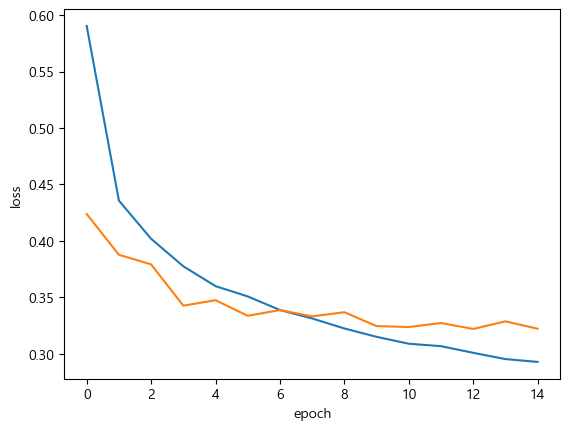

In [39]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')

In [40]:
model.evaluate(val_scaled,val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 491us/step - accuracy: 0.8885 - loss: 0.3187


[0.3219756782054901, 0.8845000267028809]

In [ ]:
# 모델결정        model = keras.Sequential()
# flatten층 추가  model.add(keras.layers.Flatten(input_shape=(28,28)))
# Dense층 추가    model.add(keras.layers.Dense(100,activation='relu'))
# Dropout 규제    model.add(keras.layers.Dropout(0.3))    # 30%를 제외시키는 규제 적용
# Dense층 추가    model.add(keras.layers.Dense(10,activation='softmax'))        # 분류 개수
# 구성확인        model.summary()
# 모델설정        model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
# 모델체크포인트   checkpoint_cb = keras.callbacks.ModelCheckpoint('best_model.keras')
# 조기종료        early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,restore_best_weights=True)
# 훈련(히스토리)   history = model.fit(train_scaled,train_target,epochs=20,validation_data=(val_scaled,val_target),callbacks=[checkpoint_cb,early_stopping_cb])
# 모델평가        model.evaluate(val_scaled,val_target)